In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
base_path = ''

In [2]:
df = pd.read_csv(base_path + 'cat1017_2.csv')
df

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
0,2020-12-22,93682091,스니커즈피넛싱글,1,990,990,12,1
1,2020-12-23,93682091,스니커즈피넛싱글,1,990,990,12,2
2,2021-01-02,93682091,스니커즈피넛싱글,1,990,990,1,5
3,2021-01-11,93682091,스니커즈피넛싱글,5,990,4950,1,0
4,2021-01-13,93682091,스니커즈피넛싱글,6,990,5940,1,2
...,...,...,...,...,...,...,...,...
15354025,2022-09-21,8886467100055,프링글스핫스파이스,2,1980,3960,9,2
15354026,2022-09-24,8886467100055,프링글스핫스파이스,1,1980,1980,9,5
15354027,2022-09-27,8886467100055,프링글스핫스파이스,1,1980,1980,9,1
15354028,2022-09-29,8886467100055,프링글스핫스파이스,2,1980,3960,9,3


In [4]:
from dtaidistance import dtw

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15354030 entries, 0 to 15354029
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   SAL_DT    object
 1   PLU_CD    int64 
 2   GDS_NM    object
 3   SALE_QTY  int64 
 4   SALE_PRC  int64 
 5   SALE_AMT  int64 
 6   month     int64 
 7   weekday   int64 
dtypes: int64(6), object(2)
memory usage: 937.1+ MB


In [10]:
df['GDS_NM'].value_counts().head(30)

대파1단            92565
서울우유            84293
백오이1개           66353
깻잎5묶음봉          58581
인큐애호박2개행사       56061
처음처럼            49388
느타리버섯1팩         49326
참이슬후레쉬          48123
새송이버섯1봉         47917
남양맛있는우유GT기획     46758
적상추1봉비닐         44623
인큐애호박1개         42859
감자              42769
토속대란1판          41765
청양고추소           40398
대파              40099
백오이5개           39953
CJ양념이잘배는찌개두부    37686
백오이             37066
농심신라면멀티         37035
부추1단            35409
추부깻잎1봉          35060
대림신선한콩나물        33786
양파중1망           32793
쌀소성주            32038
풀무원소가찌개두부       31621
CJ삼호부산어묵바른사각    30644
코카콜라            30275
청상추1봉           29645
서울장수막걸리         28470
Name: GDS_NM, dtype: int64

In [14]:
wdf = df[df['GDS_NM'].str.contains('수박')]
wdf

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
154549,2021-01-01,201490,수박1통,1,9800,9800,1,4
154550,2021-01-02,201490,수박1통,1,9800,9800,1,5
154551,2021-01-04,201490,수박1통,1,9800,9800,1,0
154552,2021-01-04,201490,수박1통,1,9800,9800,1,0
154553,2021-01-04,201490,수박1통,1,9800,9800,1,0
...,...,...,...,...,...,...,...,...
15321220,2022-09-14,8801117568412,오초코파이수박,1,5200,4200,9,2
15321221,2022-09-14,8801117568412,오초코파이수박,1,5200,4200,9,2
15321222,2022-09-15,8801117568412,오초코파이수박,1,5200,4200,9,3
15321223,2022-09-16,8801117568412,오초코파이수박,1,5200,4200,9,4


In [17]:
wdf['GDS_NM'].value_counts() # 망고수박1통행사

롯데수박바젤리       1904
망고수박1통행사      1465
롯데잘익은왕수박바     1153
롯왕수박1400       950
복수박1통행사        853
              ... 
씨없는수박4kg1통       2
복수박미니수박          1
해태부라보콘수박         1
롯자일리톨알파수박        1
하우스꿀수박젇단세일       1
Name: GDS_NM, Length: 102, dtype: int64

In [15]:
pdf = df[df['GDS_NM'].str.contains('복숭아')]
pdf

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
126300,2021-05-14,201414,복숭아,1,5980,5980,5,4
126301,2021-07-05,201414,복숭아,1,6000,6000,7,0
126302,2021-07-05,201414,복숭아,1,2000,2000,7,0
126303,2021-07-06,201414,복숭아,1,7980,7980,7,1
126304,2021-07-06,201414,복숭아,1,5000,5000,7,1
...,...,...,...,...,...,...,...,...
15353560,2022-04-08,8850389106280,샘표모구모구복숭아,1,1000,1000,4,4
15353561,2022-04-09,8850389106280,샘표모구모구복숭아,1,1000,1000,4,5
15353562,2022-04-11,8850389106280,샘표모구모구복숭아,1,1000,1000,4,0
15353563,2022-04-19,8850389106280,샘표모구모구복숭아,1,1000,1000,4,1


In [18]:
pdf['GDS_NM'].value_counts() #천도복숭아8입1팩

천도복숭아8입1팩           10769
복숭아6입2팩              6091
왕특딱딱이복숭아6개           4520
천도복숭아                3247
복숭아                  2405
                    ...  
롯데2부족할때복숭아240ml6        1
복숭아황도행사                 1
티오아이스티복숭아맛234g          1
LG샤프란AURA빅에그복숭아향        1
파르텔빅에그복숭아향              1
Name: GDS_NM, Length: 424, dtype: int64

In [16]:
sdf = df[df['GDS_NM'].str.contains('딸기')]
sdf

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
4070,2021-06-05,72810772170,리고딸기향시럽,1,4680,4680,6,5
4071,2021-06-17,72810772170,리고딸기향시럽,1,4680,4680,6,3
4072,2021-06-21,72810772170,리고딸기향시럽,1,4680,4680,6,0
4073,2021-06-21,72810772170,리고딸기향시럽,1,4680,4680,6,0
4074,2021-06-21,72810772170,리고딸기향시럽,1,4680,4680,6,0
...,...,...,...,...,...,...,...,...
15325642,2022-09-17,8801128945288,팔도뽀로로딸기맛,1,1000,1000,9,5
15325643,2022-09-24,8801128945288,팔도뽀로로딸기맛,1,1000,1000,9,5
15325644,2022-09-28,8801128945288,팔도뽀로로딸기맛,1,1000,1000,9,2
15327043,2022-07-13,8801155731632,덴마크딸기우유,1,1500,1000,7,2


In [19]:
sdf['GDS_NM'].value_counts() #딸기

빙그레요플레딸기            7407
딸기                  6869
딸기341팩              6270
하우스딸기               5856
팩딸기3팩전단             5772
                    ... 
제티체콕딸기                 1
매일우유속딸기과즙310mL         1
뚜또코코딸기                 1
빙그레오프룻딸기알로에180ml       1
어린이2080치약딸기            1
Name: GDS_NM, Length: 727, dtype: int64

In [6]:
df = df.astype({'SAL_DT' : 'str'})

In [7]:
df['SAL_DT'] = pd.to_datetime(df['SAL_DT'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15354030 entries, 0 to 15354029
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   SAL_DT    datetime64[ns]
 1   PLU_CD    int64         
 2   GDS_NM    object        
 3   SALE_QTY  int64         
 4   SALE_PRC  int64         
 5   SALE_AMT  int64         
 6   month     int64         
 7   weekday   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 937.1+ MB


In [20]:
a = df[df['GDS_NM'].str.contains('망고수박1통행사')]
a

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
1944599,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944600,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944601,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944602,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944603,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
...,...,...,...,...,...,...,...,...
1946059,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2
1946060,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2
1946061,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2
1946062,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2


In [21]:
b = df[df['GDS_NM'].str.contains('천도복숭아8입1팩')]
b

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
1279068,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
1279069,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
1279070,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
1279071,2021-06-11,2908990007826,천도복숭아8입1팩,2,4980,9960,6,4
1279072,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
...,...,...,...,...,...,...,...,...
1289832,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6
1289833,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6
1289834,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6
1289835,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6


In [22]:
c = df[df['GDS_NM'].str.contains('딸기341팩')]
c

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
1043421,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043422,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043423,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043424,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043425,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
...,...,...,...,...,...,...,...,...
1049686,2021-06-04,2908990006447,딸기341팩,2,3980,7960,6,4
1049687,2021-06-04,2908990006447,딸기341팩,1,3980,3980,6,4
1049688,2021-06-04,2908990006447,딸기341팩,1,3980,3980,6,4
1049689,2021-06-04,2908990006447,딸기341팩,1,3980,3980,6,4


In [41]:
a = a[['SAL_DT', 'SALE_AMT']]
a

,SAL_DT,SALE_AMT
1944599,2021-07-13,3980
1944600,2021-07-13,3980
1944601,2021-07-13,3980
1944602,2021-07-13,3980
1944603,2021-07-13,3980
...,...,...
1946059,2022-06-08,9800
1946060,2022-06-08,9800
1946061,2022-06-08,9800
1946062,2022-06-08,9800


In [42]:
a.sort_values('SAL_DT')

,SAL_DT,SALE_AMT
1944599,2021-07-13,3980
1944600,2021-07-13,3980
1944601,2021-07-13,3980
1944602,2021-07-13,3980
1944603,2021-07-13,3980
...,...,...
1946058,2022-06-08,9800
1946059,2022-06-08,9800
1946060,2022-06-08,9800
1946061,2022-06-08,9800


In [47]:
a = a.groupby('SAL_DT').sum()
a

,SALE_AMT
SAL_DT,
2021-07-13,27860
2021-07-14,43780
2021-07-15,150500
2021-07-16,256480
2021-07-17,330000
2021-07-18,112500
2021-09-13,65780
2021-09-14,99600
2021-09-15,40840


<AxesSubplot:xlabel='SAL_DT'>

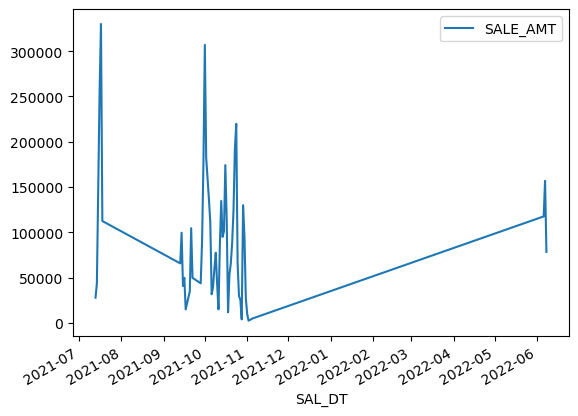

In [65]:
a.plot()

In [43]:
b = b[['SAL_DT', 'SALE_AMT']]
b

,SAL_DT,SALE_AMT
1279068,2021-06-11,4980
1279069,2021-06-11,4980
1279070,2021-06-11,4980
1279071,2021-06-11,9960
1279072,2021-06-11,4980
...,...,...
1289832,2022-09-25,9800
1289833,2022-09-25,9800
1289834,2022-09-25,9800
1289835,2022-09-25,9800


In [44]:
b.sort_values('SAL_DT')

,SAL_DT,SALE_AMT
1279068,2021-06-11,4980
1279087,2021-06-11,9960
1279086,2021-06-11,4980
1279084,2021-06-11,4980
1279083,2021-06-11,4980
...,...,...
1289831,2022-09-25,9800
1289832,2022-09-25,9800
1289833,2022-09-25,9800
1289834,2022-09-25,9800


In [48]:
b = b.groupby('SAL_DT').sum()
b

,SALE_AMT
SAL_DT,
2021-06-11,124500
2021-06-12,184260
2021-06-13,129480
2021-06-14,129480
2021-06-15,229080
...,...
2022-09-20,205800
2022-09-23,117600
2022-09-24,166600


<AxesSubplot:xlabel='SAL_DT'>

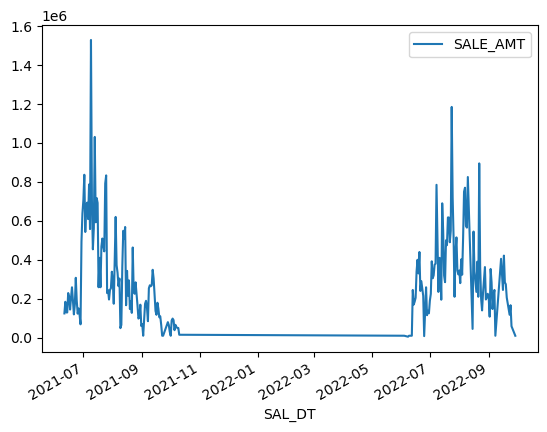

In [66]:
b.plot()

In [45]:
c = c[['SAL_DT', 'SALE_AMT']]
c

,SAL_DT,SALE_AMT
1043421,2020-12-20,7980
1043422,2020-12-20,7980
1043423,2020-12-20,7980
1043424,2020-12-20,7980
1043425,2020-12-20,7980
...,...,...
1049686,2021-06-04,7960
1049687,2021-06-04,3980
1049688,2021-06-04,3980
1049689,2021-06-04,3980


In [46]:
c.sort_values('SAL_DT')

,SAL_DT,SALE_AMT
1043421,2020-12-20,7980
1043444,2020-12-20,7980
1043445,2020-12-20,7980
1043446,2020-12-20,7980
1043447,2020-12-20,7980
...,...,...
1049674,2021-06-04,3980
1049673,2021-06-04,7960
1049689,2021-06-04,3980
1049680,2021-06-04,3980


In [49]:
c = c.groupby('SAL_DT').sum()
c

,SALE_AMT
SAL_DT,
2020-12-20,335160
2020-12-21,279300
2020-12-22,343140
2020-12-23,227080
2020-12-26,48800
...,...
2021-05-24,74700
2021-05-26,127360
2021-05-28,49800


<AxesSubplot:xlabel='SAL_DT'>

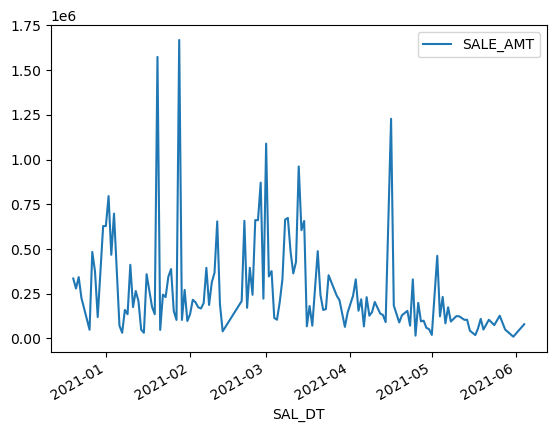

In [67]:
c.plot()

In [40]:
import os
import numpy as np
import pandas as pd
from fastdtw import fastdtw
import _ucrdtw
import glob
import re
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='SAL_DT', ylabel='SALE_AMT'>

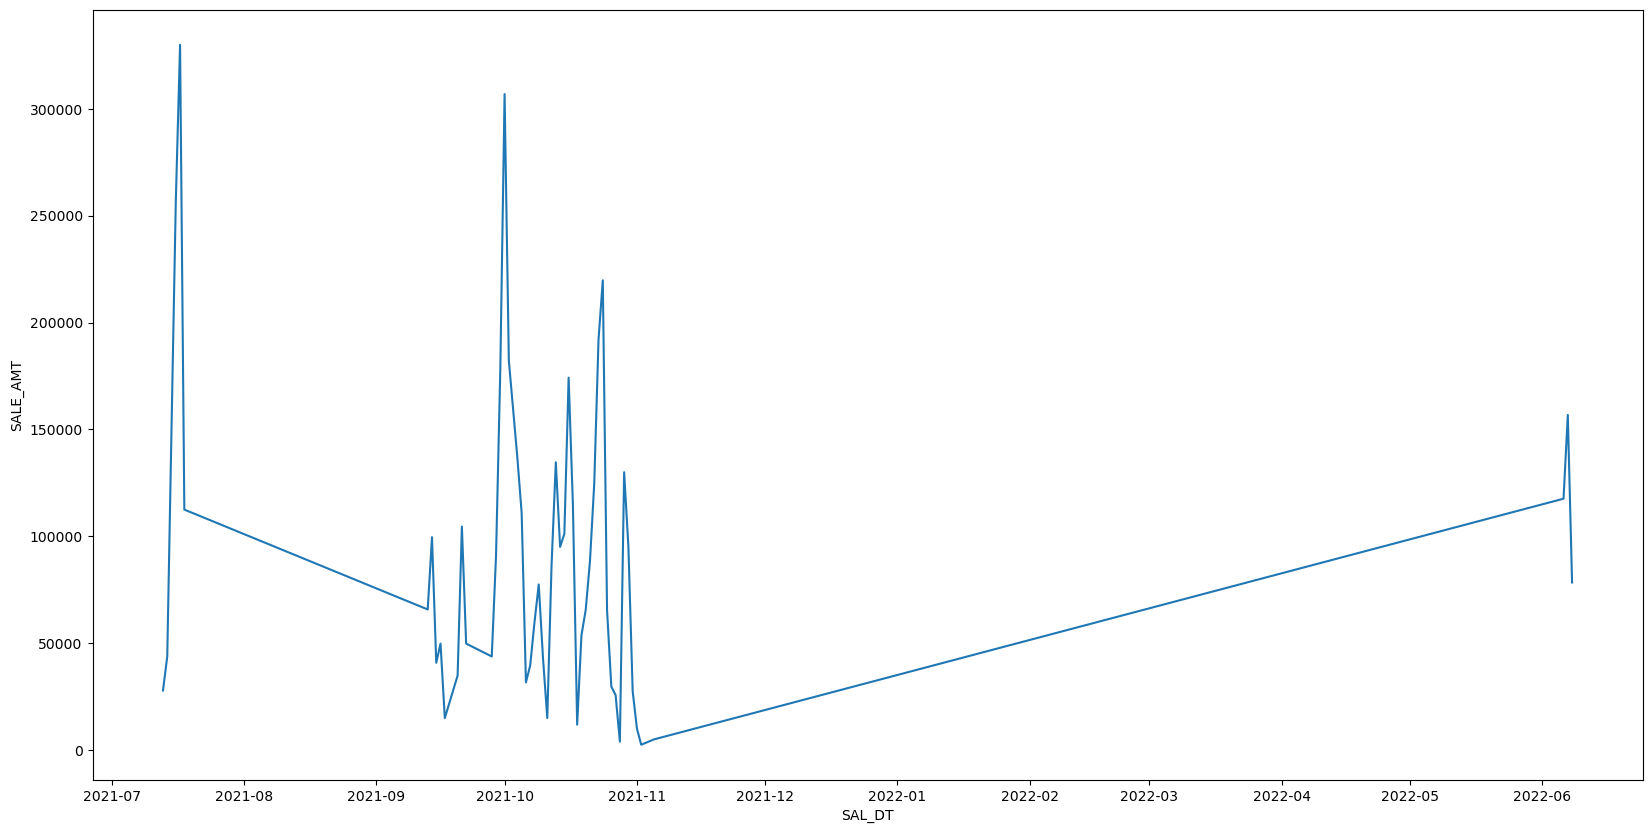

In [51]:
plt.figure(figsize = (20,10))
sns.lineplot(x = a.index, y = a['SALE_AMT'])

<AxesSubplot:xlabel='SAL_DT', ylabel='SALE_AMT'>

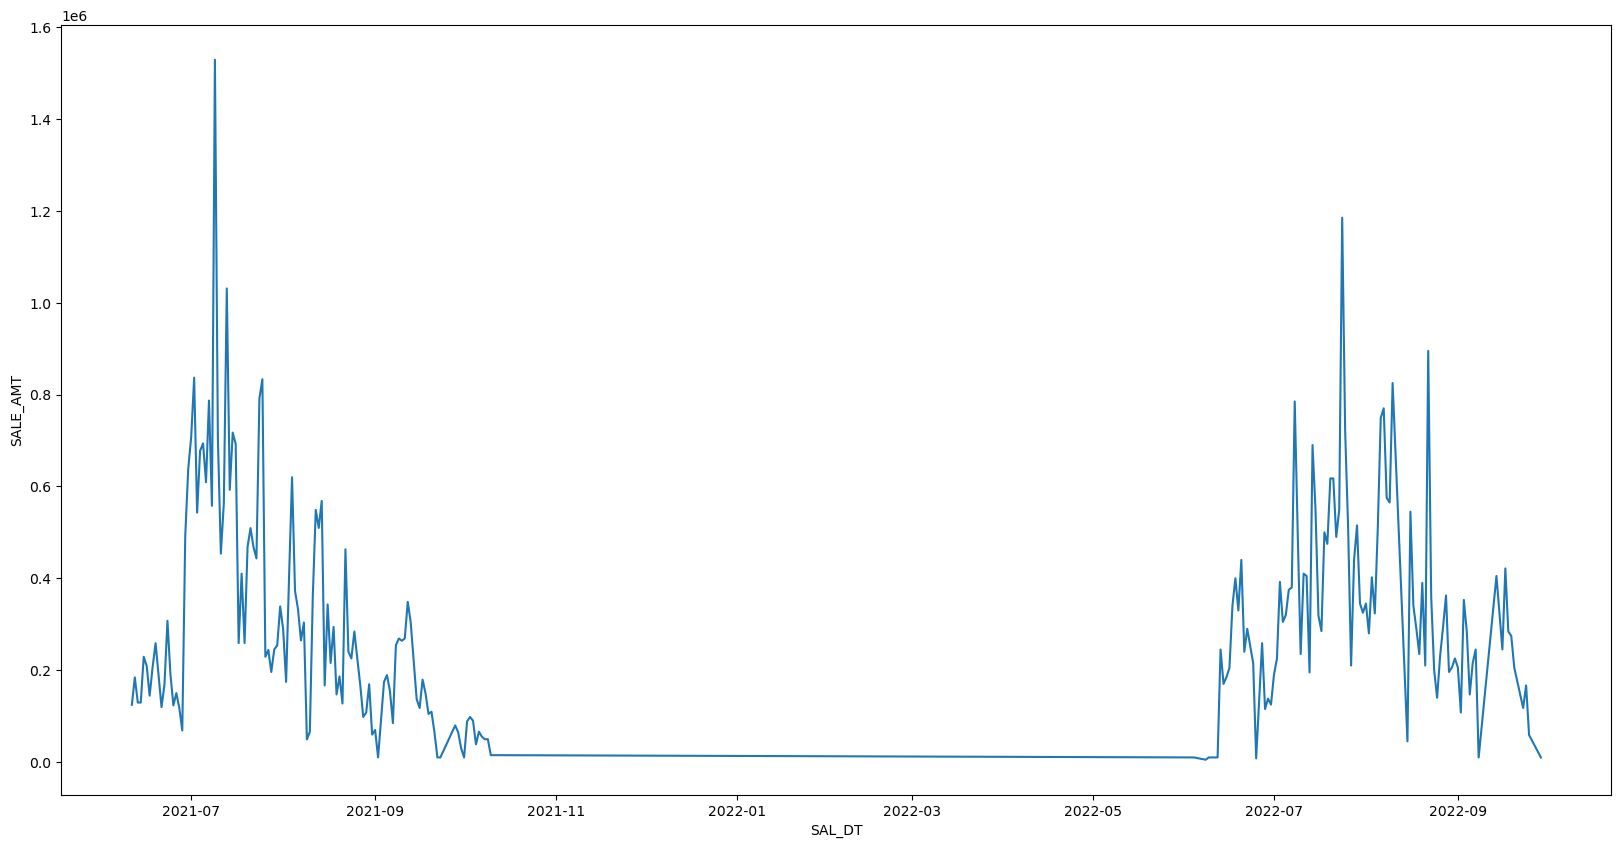

In [52]:
plt.figure(figsize = (20,10))
sns.lineplot(x = b.index, y = b['SALE_AMT'])

In [60]:
a1 = a['SALE_AMT'].to_list()
list(a['SALE_AMT'])

[27860,
 43780,
 150500,
 256480,
 330000,
 112500,
 65780,
 99600,
 40840,
 49800,
 14940,
 34860,
 104580,
 49800,
 43780,
 91100,
 178200,
 306900,
 182160,
 136620,
 110880,
 31680,
 39600,
 59700,
 77480,
 42960,
 15000,
 86420,
 134640,
 95040,
 101180,
 174240,
 114840,
 11880,
 53640,
 65560,
 88460,
 124740,
 192060,
 219780,
 65340,
 29700,
 25740,
 3960,
 130000,
 95000,
 27500,
 10000,
 2500,
 5000,
 117600,
 156800,
 78400]

In [58]:
b1 = b['SALE_AMT'].to_list()
list(b['SALE_AMT'])

[124500,
 184260,
 129480,
 129480,
 229080,
 209160,
 144420,
 206960,
 258700,
 119520,
 169320,
 307460,
 191040,
 123380,
 150040,
 117600,
 68600,
 493020,
 637440,
 707160,
 836640,
 542820,
 677280,
 693660,
 609040,
 786840,
 557760,
 1528860,
 704460,
 453720,
 562740,
 1030860,
 592620,
 717120,
 692220,
 258960,
 410000,
 258960,
 468140,
 509100,
 468120,
 443220,
 791820,
 833400,
 229080,
 244020,
 196000,
 245000,
 253820,
 338640,
 288840,
 174300,
 404400,
 620000,
 372400,
 333200,
 264600,
 303800,
 49000,
 65780,
 362600,
 548800,
 509600,
 568400,
 166600,
 343000,
 215600,
 294000,
 147000,
 186200,
 127400,
 463140,
 240180,
 225400,
 284200,
 166600,
 98000,
 107800,
 169320,
 59760,
 69720,
 9960,
 174300,
 189240,
 154380,
 84660,
 253980,
 268920,
 263940,
 268920,
 348600,
 303780,
 137200,
 117600,
 179280,
 149400,
 104580,
 109560,
 64740,
 9960,
 9960,
 79680,
 64740,
 29880,
 9800,
 88200,
 98000,
 90000,
 38500,
 66000,
 55000,
 49500,
 49800,
 14940,


In [61]:
c1 = c['SALE_AMT'].to_list()
list(c['SALE_AMT'])

[335160,
 279300,
 343140,
 227080,
 48800,
 483700,
 375000,
 119600,
 628200,
 628200,
 795720,
 467660,
 698000,
 382720,
 71820,
 31920,
 159600,
 135660,
 411820,
 175560,
 265240,
 209400,
 49000,
 31920,
 359100,
 176400,
 135660,
 1573680,
 47880,
 245240,
 231420,
 345000,
 387920,
 153560,
 103740,
 1668300,
 103740,
 271320,
 97740,
 135660,
 216380,
 202420,
 174500,
 167580,
 197460,
 394680,
 187500,
 314100,
 367080,
 654360,
 191520,
 39900,
 209300,
 657380,
 171420,
 395180,
 244020,
 661900,
 661000,
 870900,
 222880,
 1089000,
 346840,
 376680,
 114540,
 104700,
 202420,
 330720,
 664340,
 673820,
 485680,
 363540,
 428280,
 961320,
 605420,
 656700,
 67960,
 181280,
 71640,
 488040,
 244020,
 159360,
 164340,
 353360,
 239040,
 214140,
 64740,
 144420,
 192040,
 238800,
 330340,
 155220,
 218900,
 67660,
 230840,
 127360,
 147260,
 204180,
 139440,
 131340,
 91540,
 1227760,
 184260,
 89640,
 129480,
 154380,
 71640,
 330340,
 15920,
 199000,
 95520,
 99500,
 59700

In [62]:
from dtaidistance import dtw

distance = dtw.distance(a1, b1)
print(distance)

3008707.9321861733


In [63]:
distance = dtw.distance(a1, c1)
print(distance)

2969221.8852083115


In [64]:
distance = dtw.distance(b1, c1)
print(distance)

2397227.137590429


In [68]:
a

,SALE_AMT
SAL_DT,
2021-07-13,27860
2021-07-14,43780
2021-07-15,150500
2021-07-16,256480
2021-07-17,330000
2021-07-18,112500
2021-09-13,65780
2021-09-14,99600
2021-09-15,40840


In [69]:
b

,SALE_AMT
SAL_DT,
2021-06-11,124500
2021-06-12,184260
2021-06-13,129480
2021-06-14,129480
2021-06-15,229080
...,...
2022-09-20,205800
2022-09-23,117600
2022-09-24,166600


In [70]:
c

,SALE_AMT
SAL_DT,
2020-12-20,335160
2020-12-21,279300
2020-12-22,343140
2020-12-23,227080
2020-12-26,48800
...,...
2021-05-24,74700
2021-05-26,127360
2021-05-28,49800


In [71]:
wdf

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
154549,2021-01-01,201490,수박1통,1,9800,9800,1,4
154550,2021-01-02,201490,수박1통,1,9800,9800,1,5
154551,2021-01-04,201490,수박1통,1,9800,9800,1,0
154552,2021-01-04,201490,수박1통,1,9800,9800,1,0
154553,2021-01-04,201490,수박1통,1,9800,9800,1,0
...,...,...,...,...,...,...,...,...
15321220,2022-09-14,8801117568412,오초코파이수박,1,5200,4200,9,2
15321221,2022-09-14,8801117568412,오초코파이수박,1,5200,4200,9,2
15321222,2022-09-15,8801117568412,오초코파이수박,1,5200,4200,9,3
15321223,2022-09-16,8801117568412,오초코파이수박,1,5200,4200,9,4


In [72]:
pdf

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
126300,2021-05-14,201414,복숭아,1,5980,5980,5,4
126301,2021-07-05,201414,복숭아,1,6000,6000,7,0
126302,2021-07-05,201414,복숭아,1,2000,2000,7,0
126303,2021-07-06,201414,복숭아,1,7980,7980,7,1
126304,2021-07-06,201414,복숭아,1,5000,5000,7,1
...,...,...,...,...,...,...,...,...
15353560,2022-04-08,8850389106280,샘표모구모구복숭아,1,1000,1000,4,4
15353561,2022-04-09,8850389106280,샘표모구모구복숭아,1,1000,1000,4,5
15353562,2022-04-11,8850389106280,샘표모구모구복숭아,1,1000,1000,4,0
15353563,2022-04-19,8850389106280,샘표모구모구복숭아,1,1000,1000,4,1


In [73]:
sdf

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
4070,2021-06-05,72810772170,리고딸기향시럽,1,4680,4680,6,5
4071,2021-06-17,72810772170,리고딸기향시럽,1,4680,4680,6,3
4072,2021-06-21,72810772170,리고딸기향시럽,1,4680,4680,6,0
4073,2021-06-21,72810772170,리고딸기향시럽,1,4680,4680,6,0
4074,2021-06-21,72810772170,리고딸기향시럽,1,4680,4680,6,0
...,...,...,...,...,...,...,...,...
15325642,2022-09-17,8801128945288,팔도뽀로로딸기맛,1,1000,1000,9,5
15325643,2022-09-24,8801128945288,팔도뽀로로딸기맛,1,1000,1000,9,5
15325644,2022-09-28,8801128945288,팔도뽀로로딸기맛,1,1000,1000,9,2
15327043,2022-07-13,8801155731632,덴마크딸기우유,1,1500,1000,7,2


In [74]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 154549 to 15321224
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SAL_DT    19945 non-null  datetime64[ns]
 1   PLU_CD    19945 non-null  int64         
 2   GDS_NM    19945 non-null  object        
 3   SALE_QTY  19945 non-null  int64         
 4   SALE_PRC  19945 non-null  int64         
 5   SALE_AMT  19945 non-null  int64         
 6   month     19945 non-null  int64         
 7   weekday   19945 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.4+ MB


In [75]:
z = df[df['GDS_NM'].str.contains('망고수박1통행사')]
z

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
1944599,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944600,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944601,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944602,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
1944603,2021-07-13,2999000000616,망고수박1통행사,1,3980,3980,7,1
...,...,...,...,...,...,...,...,...
1946059,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2
1946060,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2
1946061,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2
1946062,2022-06-08,2999000000616,망고수박1통행사,1,9800,9800,6,2


In [76]:
x = df[df['GDS_NM'].str.contains('천도복숭아8입1팩')]
x

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
1279068,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
1279069,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
1279070,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
1279071,2021-06-11,2908990007826,천도복숭아8입1팩,2,4980,9960,6,4
1279072,2021-06-11,2908990007826,천도복숭아8입1팩,1,4980,4980,6,4
...,...,...,...,...,...,...,...,...
1289832,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6
1289833,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6
1289834,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6
1289835,2022-09-25,2908990007826,천도복숭아8입1팩,1,9800,9800,9,6


In [77]:
v = df[df['GDS_NM'].str.contains('딸기341팩')]
v

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
1043421,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043422,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043423,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043424,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
1043425,2020-12-20,2908990006447,딸기341팩,1,7980,7980,12,6
...,...,...,...,...,...,...,...,...
1049686,2021-06-04,2908990006447,딸기341팩,2,3980,7960,6,4
1049687,2021-06-04,2908990006447,딸기341팩,1,3980,3980,6,4
1049688,2021-06-04,2908990006447,딸기341팩,1,3980,3980,6,4
1049689,2021-06-04,2908990006447,딸기341팩,1,3980,3980,6,4


In [78]:
zz = z[['SAL_DT', 'GDS_NM', 'SALE_AMT']]
zz

,SAL_DT,GDS_NM,SALE_AMT
1944599,2021-07-13,망고수박1통행사,3980
1944600,2021-07-13,망고수박1통행사,3980
1944601,2021-07-13,망고수박1통행사,3980
1944602,2021-07-13,망고수박1통행사,3980
1944603,2021-07-13,망고수박1통행사,3980
...,...,...,...
1946059,2022-06-08,망고수박1통행사,9800
1946060,2022-06-08,망고수박1통행사,9800
1946061,2022-06-08,망고수박1통행사,9800
1946062,2022-06-08,망고수박1통행사,9800


In [81]:
prepared_df = zz
prepared_df

,SAL_DT,GDS_NM,SALE_AMT
1944599,2021-07-13,망고수박1통행사,3980
1944600,2021-07-13,망고수박1통행사,3980
1944601,2021-07-13,망고수박1통행사,3980
1944602,2021-07-13,망고수박1통행사,3980
1944603,2021-07-13,망고수박1통행사,3980
...,...,...,...
1946059,2022-06-08,망고수박1통행사,9800
1946060,2022-06-08,망고수박1통행사,9800
1946061,2022-06-08,망고수박1통행사,9800
1946062,2022-06-08,망고수박1통행사,9800


In [87]:
df = prepared_df.copy()

def create_traces_for_date(date, df):
    """Indexes dataframe to given date and returns list of traces."""

    trace_list = []
    calculated_df, _ = create_indexed_columns(date, df)
    for trace in calculated_df.columns:
        datadict = dict(
            name=trace[1],
            type="scatter",
            x=calculated_df.index,
            y=calculated_df[trace],
            yaxis="y"
        )
        trace_list.append(datadict)
    reference_line = create_reference_line(
        x=date, name=df.SAL_DT('%Y-%m-%d'))
    return trace_list + [reference_line]

In [88]:
def make_initial_sliders_dict():
    """Generates a dictionary that describes the initial slider."""
    
    sliders_dict = dict(
        yanchor='top',
        xanchor='left',
        currentvalue=dict(
            font=dict(size=16),
            prefix='Current date: ',
            visible=True,
            xanchor='right'
        ),
        pad=dict(b=10, t=50),
        len=1,
        x=0,
        y=0,
        steps=[],
    )
    return sliders_dict

In [89]:
def create_slider_step(frame_name, redraw):
    """Generates a list of slider steps."""
    
    slider_step = dict(
        args=[[frame_name, frame_name], dict(
            frame=dict(duration=0, redraw=redraw),
            mode='immmediate',
            transition=dict(duration=0))
        ],
        label=frame_name,
        method='animate'
    )
    return slider_step

In [90]:
# create slider step and frame for each step
def make_steps_and_frames(df, redraw=False):
    """Generates a list of steps and a list of frames for given df."""

    slider_step_list, frame_list = [], []
    for date in df.index:
        datestring = dff.strftime('%Y-%m-%d')
        frame = dict(
            data=create_traces_for_date(date, df),
            name=datestring)
        frame_list.append(frame)
        step = create_slider_step(datestring, redraw)
        slider_step_list.append(step)

    return slider_step_list, frame_list

In [91]:
def make_dynamic_index_chart(df, redraw=False):
    """Creates the entire dynamic index chart."""

    slider_step_list, frame_list = make_steps_and_frames(df, redraw)
    
    sliders_dict = make_initial_sliders_dict()
    sliders_dict['steps'] = slider_step_list

    new_fig = go.Figure(data=frame_list[0]['data'], frames=frame_list)
    new_fig.update_layout(sliders=[sliders_dict])
    style_plot(new_fig)
    
    return new_fig


new_fig = make_dynamic_index_chart(df)
new_fig.show()

AttributeError: 'int' object has no attribute 'strftime'